## **Fundamentos de Data Science**

### **Analizando la Rotación de Clientes en Telecomunicaciones**

### **Requisitos:**

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

El dataset puede ser encontrado aquí: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## **1. Limpieza de datos con Python:**

### **Identificar y solucionar cualquier valor duplicado.**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Carga de datos
path = '..\data\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- tenure: Number of months the customer has stayed with the company
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

In [2]:
# Exploracion inicial de los datos
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Limpieza de datos con Python:**

### **Identificar y solucionar cualquier valor duplicado.** 

Asegúrate de que cada registro en el dataset sea único

In [3]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Convertimos a Cadena
df['customerID'] = df['customerID'].astype(str)

# Agrupamos todas la columnas con opciones binarias
columnas_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn','InternetService', 'Contract', 'PaymentMethod', 'SeniorCitizen']

df[columnas_categoricas] = df[columnas_categoricas].astype('category')

# Converitimos tenure a enteros
df['tenure'] = df['tenure'].astype(int)

# Convertimos TotalCharges a numerico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificamos los tipos de datos
print(df.dtypes)

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


### **Consistencia en valores categóricos**

Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [6]:
# Verificamos los valores unicos utilizando un loop que pase por todas las columnas categoricas
for col in df.select_dtypes(include='category').columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'gender':
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Unique values in 'SeniorCitizen':
[0, 1]
Categories (2, int64): [0, 1]
Unique values in 'Partner':
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Unique values in 'Dependents':
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Unique values in 'PhoneService':
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Unique values in 'MultipleLines':
['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']
Unique values in 'InternetService':
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
Unique values in 'OnlineSecurity':
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Unique values in 'OnlineBackup':
['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Unique values in 'DeviceProtection':
['No', 'Yes', 'No internet service']
Categories

### **Identificar y solucionar cualquier valor faltante en el dataset.**

Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.


In [7]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

# Fuente: Clase de Manejo de valores nulos 

,datos sin NAs en q,Na en q,Na en %
TotalCharges,7032,11,0.16
gender,7043,0,0.00
SeniorCitizen,7043,0,0.00
Partner,7043,0,0.00
customerID,7043,0,0.00
Dependents,7043,0,0.00
tenure,7043,0,0.00
MultipleLines,7043,0,0.00
PhoneService,7043,0,0.00
OnlineSecurity,7043,0,0.00


In [23]:
# Rellenamos los valores multiples con el promedio de grupos que contengan valores relacionados
grouping_columns = [
    'SeniorCitizen', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'Contract'
    ]

# Use transform to fill missing 'TotalCharges' values with the median of similar rows
df['TotalCharges'] = df.groupby(grouping_columns, observed=False)['TotalCharges'] \
                        .transform(lambda x: x.fillna(x.median()))

In [9]:
# Verificamos la estadística descriptiva de Total Changes
df.TotalCharges.describe()

count    7043.000000
mean     2283.743504
std      2266.124053
min        18.800000
25%       402.225000
50%      1398.250000
75%      3794.975000
max      8684.800000
Name: TotalCharges, dtype: float64

In [10]:
# Verificamos los valores faltantes nuevamente
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
customerID,7043,0,0.0
gender,7043,0,0.0
SeniorCitizen,7043,0,0.0
Partner,7043,0,0.0
Dependents,7043,0,0.0
tenure,7043,0,0.0
PhoneService,7043,0,0.0
MultipleLines,7043,0,0.0
InternetService,7043,0,0.0
OnlineSecurity,7043,0,0.0


### **Identificacion de valores anomalos**

Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [11]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.743504
std,24.559481,30.090047,2266.124053
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1398.250000
75%,55.000000,89.850000,3794.975000
max,72.000000,118.750000,8684.800000


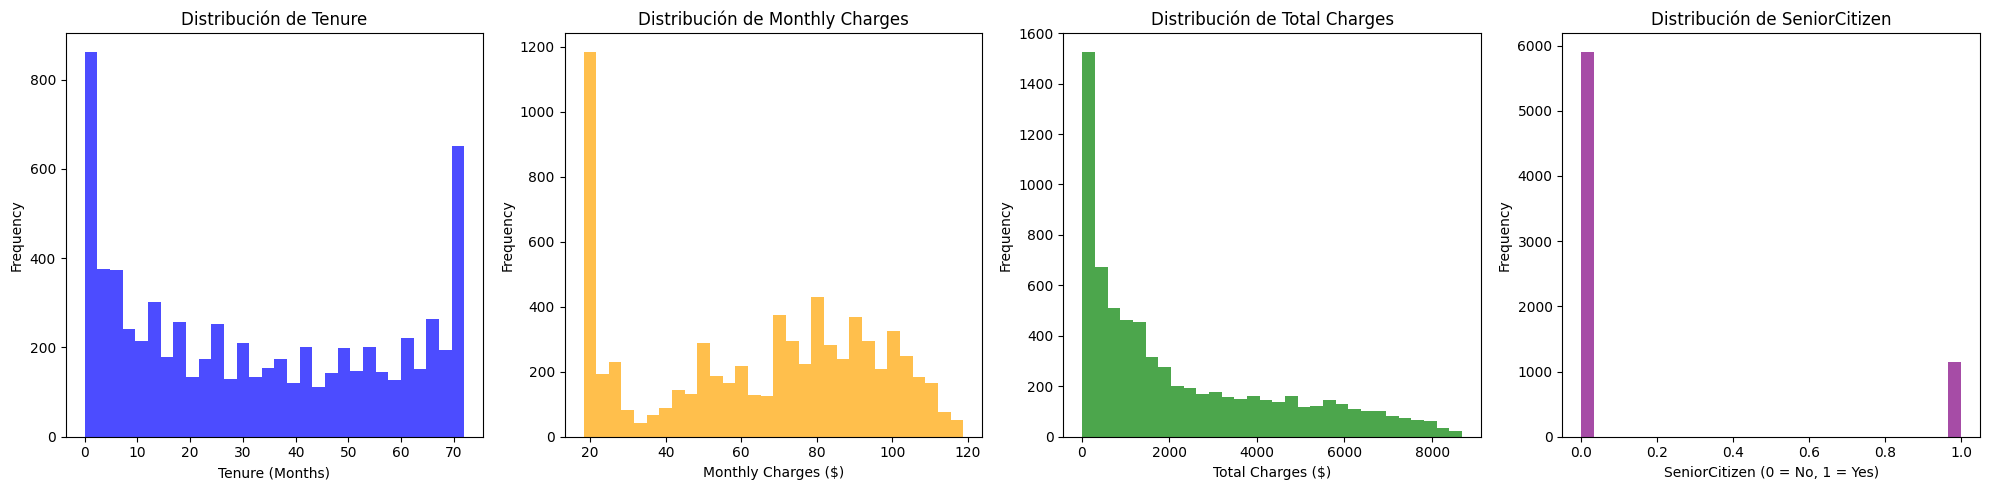

In [12]:
# Creamos una figura con 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Histograma de 'tenure'
axs[0].hist(df['tenure'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Distribución de Tenure')
axs[0].set_xlabel('Tenure (Months)')
axs[0].set_ylabel('Frequency')

# Histograma de'MonthlyCharges'
axs[1].hist(df['MonthlyCharges'], bins=30, color='orange', alpha=0.7)
axs[1].set_title('Distribución de Monthly Charges')
axs[1].set_xlabel('Monthly Charges ($)')
axs[1].set_ylabel('Frequency')

# Histograma de 'TotalCharges'
axs[2].hist(df['TotalCharges'], bins=30, color='green', alpha=0.7)
axs[2].set_title('Distribución de Total Charges')
axs[2].set_xlabel('Total Charges ($)')
axs[2].set_ylabel('Frequency')

# Histograma de 'SeniorCitizen'
axs[3].hist(df['SeniorCitizen'], bins=30, color='purple', alpha=0.7)
axs[3].set_title('Distribución de SeniorCitizen')
axs[3].set_xlabel('SeniorCitizen (0 = No, 1 = Yes)')
axs[3].set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Fuente: Visualizing avanzada : Histograma y Heatmaps
# Fuente: Codigo base clase de correccion de examenes Jueves 24 de Octubre

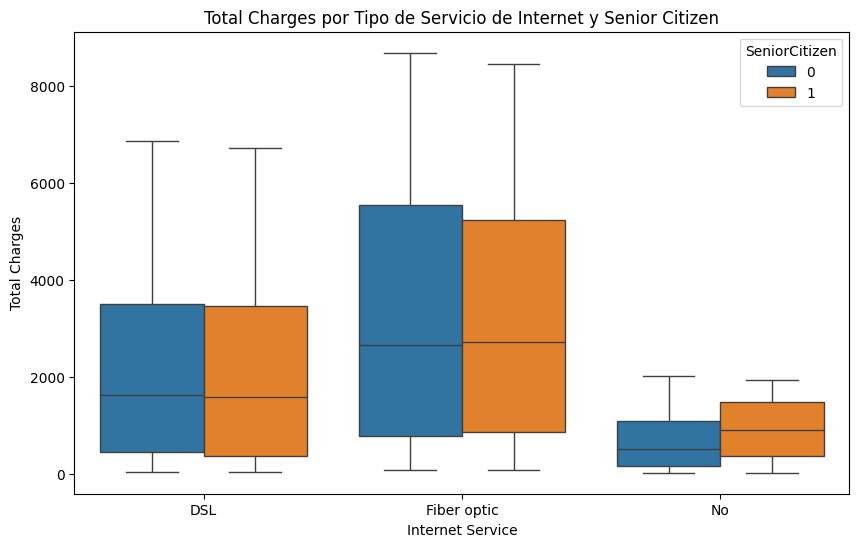

In [13]:
# Verificamos los outliners para confirmar si estos deben ser excluidos o no. En ese caso podemos ver que los valores de Total Charges varian de acuerdo al tipo de servicio.
plt.figure(figsize=(10, 6))
sns.boxplot(x='InternetService', y='TotalCharges', data=df, hue='SeniorCitizen')
plt.title('Total Charges por Tipo de Servicio de Internet y Senior Citizen')
plt.xlabel('Internet Service')
plt.ylabel('Total Charges')
plt.show()


# Fuente: Visualizacion avanzada : Histograma y Boxplot
# Fuente: Visualizacion avanzada : Clase de estilos, etiquetas, leyend. 

### **3. Exploración de datos con Python:**

### **Crear dos tipos diferentes de visualizaciones exploratorias univariadas**

Cada visualización debe incluir una breve interpretación dentro del archivo de código.


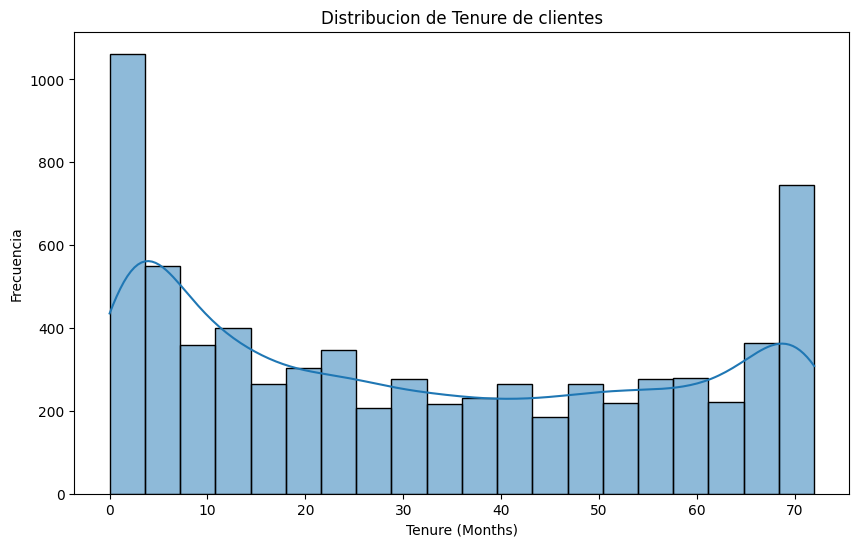

In [14]:
# Creamos un histograma de 'tenure'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', bins=20, kde=True)
plt.title('Distribucion de Tenure de clientes')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frecuencia')
plt.show()

# Fuente: Visualizing avanzada : Histograma y Boxplot
# Fuente: Visualizacion avanzada : Clase de estilos, etiquetas, leyend. 
# Fuente: Codigo base clase de correccion de examenes Jueves 24 de Octubre


El histograma presenta una distribución bimodal, muestra dos picos en la frecuencia de los valores. El primer pico se ubica entre 0 y 10 meses, lo que indica que una cantidad considerable de clientes ha contratado un servicio recientemente. El segundo pico se encuentra entre 60 y 70 meses, lo que sugiere que existe un grupo significativo de clientes que han estado utilizando el servicio durante un periodo prolongado.

Tambien, la distribución en la sección derecha indica la presencia de algunos clientes con baja antigüedad, lo que podría ser indicativo de nuevos usuarios que han comenzado a utilizar los servicios.



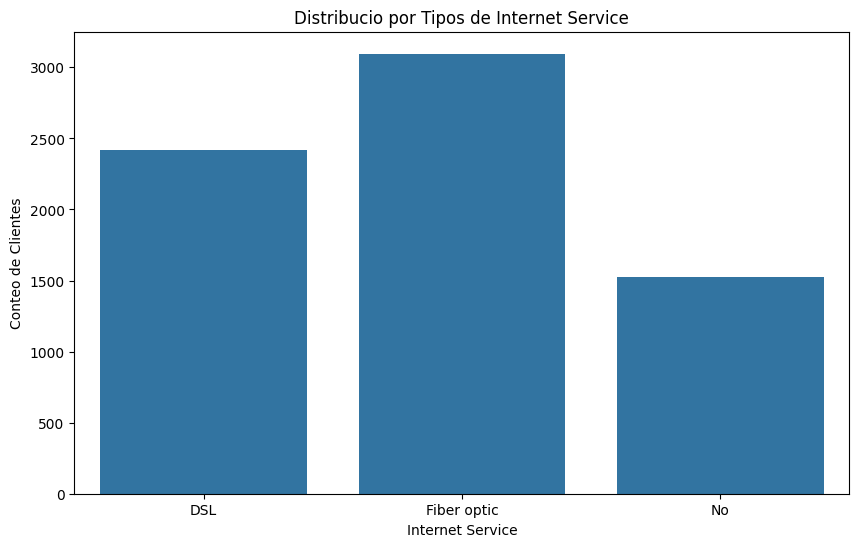

In [15]:
# Creamos un plot de Bars de 'InternetService'
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', data=df)
plt.title('Distribucio por Tipos de Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Conteo de Clientes')
plt.show()

# Fuente: Visualizacion de ciencias de datos. Analisis exploratorio de datos y matplotlib casico


Este gráfico de barras ilustra la distribución de clientes según los servicios de Internet.

- En primer lugar, se encuentra **Fiber Optic**, que destaca como el servicio más popular.
* En segundo lugar, se ubica **DSL**, que muestra una aceptación notable, aunque inferior a la fibra óptica.
- Por último, el servicio de **"Sin Internet"** se encuentra en la categoría más baja, reflejando la menor cantidad de clientes.

El gráfico revela una clara predominancia de la fibra óptica como la opción preferida para los servicios de Internet.

### **Crear dos tipos diferentes de visualizaciones exploratorias multivariadas**

Cada visualización debe incluir una breve interpretación dentro del archivo de código.

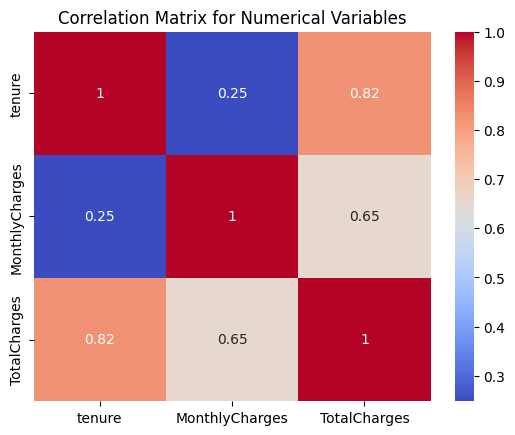

In [16]:
# Select numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

# Fuente: Visualizing avanzada : Heatmaps y Correlacion


El mapa de calor revela una fuerte correlación de 0.82 entre la **Tenure** y los **Total Charges**, indicando que a medida que aumenta la antigüedad del cliente, también tienden a aumentar sus cargos totales.

Por otro lado, la relación entre los **Total Charges**,y los **Monthly Charges** presenta una correlación moderada de 0.65, sugiriendo que hay una conexión significativa, pero no tan fuerte como la anterior.

Finalmente, a pesar de la alta correlación entre la **Tenure** y los **Total Charges**, la relación entre la **Tenure**  y los **Monthly Charges** es baja, lo que implica que una mayor antigüedad no necesariamente se traduce en un aumento proporcional en los cargos mensuales.

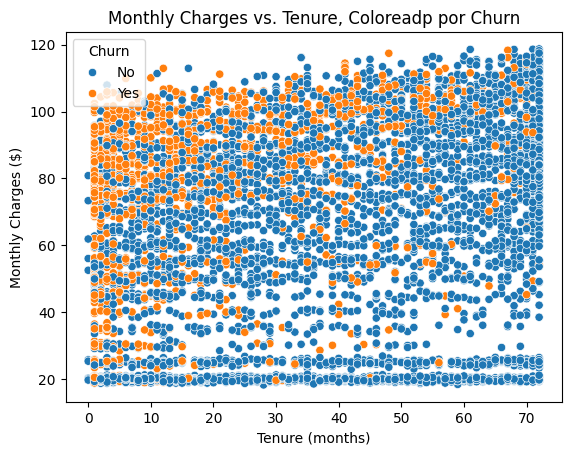

In [17]:
# Creamos un plot de dispersion entre 'tenure' y 'MonthlyCharges'
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df )
plt.title('Monthly Charges vs. Tenure, Coloreadp por Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.show()

# Fuente: Visualizing avanzada : Subplots y Seanborn
# Fuente: Visualizacion avanzada : Clase de estilos, etiquetas, leyend. 

No hay una tendencia clara entre los **Monthly Charges** y la **Tenure**. Sin embargo, podemos observar una débil tendencia relacionada con los patrones de **Churn**.

El gráfico indica que los clientes con cargos mensuales más bajos tienden a tener un mejor resindir del contrato. De manera similar, los clientes con cargos mensuales más altos también tienden a presentar tasas de churn más elevadas. Esto sugiere que el costo del servicio puede influir en la decisión de los clientes de continuar o cancelar su suscripción.

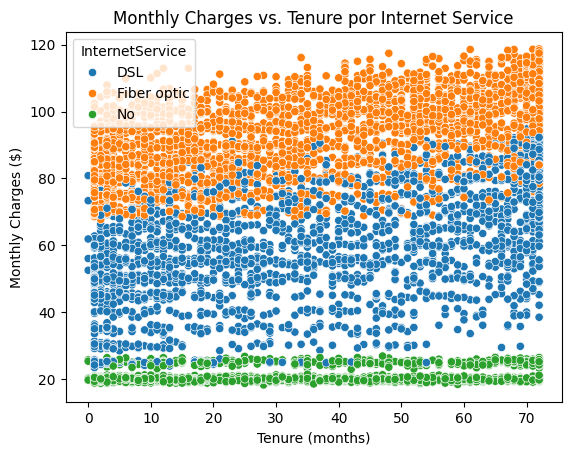

In [18]:
# Creamos un plot de dispersion entre 'tenure' y 'MonthlyCharges'
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='InternetService', data=df)
plt.title('Monthly Charges vs. Tenure por Internet Service')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.show()

# Fuente: Visualizing avanzada : Subplots y Seanborn
# Fuente: Visualizacion avanzada : Clase de estilos, etiquetas, leyend. 

Este gráfico de dispersión nos muestra cómo **Tenure** se relaciona con **Monthly Charges**, con diferentes tipos de servicio de internet. Podemos observar tendencias claras:

**DSL:** Bajo Monthly Charges, especialmente si se tiene un Tenure más alto.

**Fiber Optic:** Alto Monthly Charges, especialmente si tienen un Tenure más alto.

**No Internet Service:** Bajo Monthly Charges.

- Hay una tendencia positiva entre Tenure y Monthly Charges. Esto puede deberse a que los clientes que llevan más tiempo con la compañía tienden a contratar servicios adicionales.

- Los clientes con Fiber Optic tienen, en promedio, Monthly Charges más altos. Esto puede ser debido al costo del servicio, a la elección de mayor rapidez, entre otros factores. 

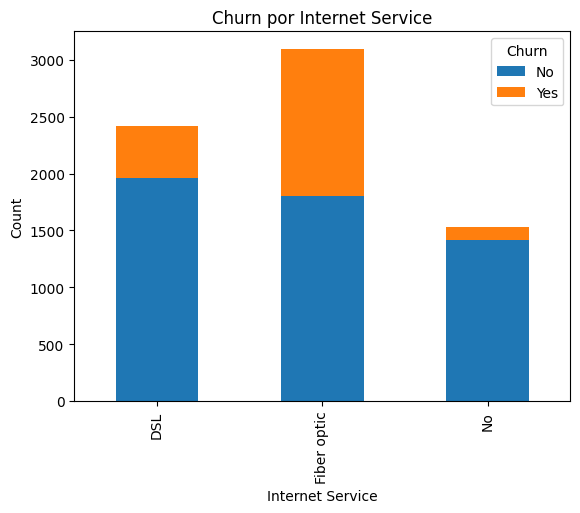

In [19]:
# Agregamos la variable 'Churn' a la columna 'InternetService'
grouped_df = df.groupby(['InternetService', 'Churn'], observed=True).size().unstack()

# Grouped bar chart
grouped_df.plot(kind='bar', stacked=True)
plt.title('Churn por Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

# Fuente: Visualizacion de ciencias de datos. Analisis exploratorio de datos y matplotlib casico
# Fuente: Visualizacion avanzada : Clase de estilos, etiquetas, leyend.


Este gráfico de barras podemos ver el número de clientes por Tipo de Serivicio de internet que terminaron sus contratos (Churn)

**Fiber Optic**:Tiene la mayor cantidad de clientes.
Tammbien tiene el mayor porcentaje de clientes que terminaron el servicio(Churn) en comparación con los otros tipos.

**DSL:** Tiene un número moderado de clientes.
Muestra una tasa de Churn más baja en comparación con la Fiber Optic.

**Sin servicio de Internet:** Tiene el menor número de clientes y una tasa de abandono baja.

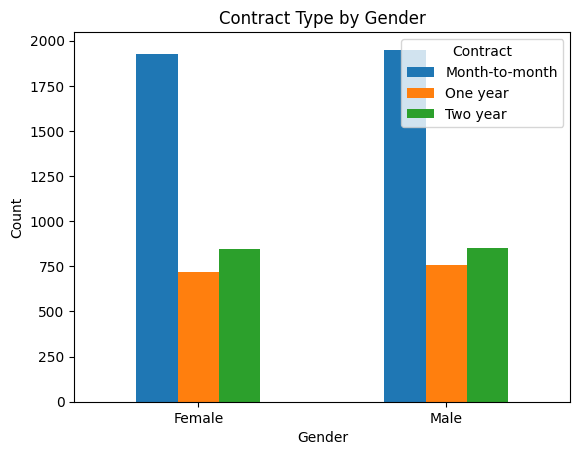

In [20]:
# Agrupomos Gender y Contract
grouped_df = df.groupby(['gender', 'Contract'], observed=True ).size().unstack()

# Creamos un plot bar para ver la relacion entre Gender y Contract
grouped_df.plot(kind='bar')
plt.title('Contract Type by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Fuente: Visualizacion de ciencias de datos. Analisis exploratorio de datos y matplotlib casico
# Fuente: Visualizacion avanzada : Clase de estilos, etiquetas, leyend.

Este gráfico de barras muestra la distribución de diferentes tipos de contratos según el género.

**Month-to-Month:** Tanto hombres como mujeres presentan cifras similares, lo que sugiere una preferencia por contratos a corto plazo que ofrecen mayor flexibilidad.

**One-Year:** Este tipo de contrato tiene el porcentaje más bajo, indicando que hay pocos clientes en comparación con las otras categorías que optan por contratos anuales.

**Two-Year:** A diferencia de lo que podríamos esperar a partir de los resultados de los contratos Month-to-Month, los contratos de Two-Year tienen un porcentaje mayor que los de One-Year.

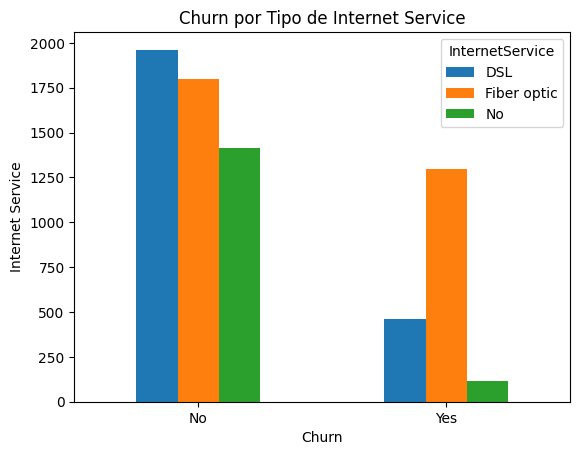

In [21]:
# Group the data by 'gender' and 'Contract' and count the occurrences
grouped_df = df.groupby(['Churn', 'InternetService'], observed=True).size().unstack()

grouped_df.plot(kind='bar')
plt.title('Churn por Tipo de Internet Service')
plt.xlabel('Churn')
plt.ylabel('Internet Service')
plt.xticks(rotation=0)  
plt.show()

# Fuente: Visualizacion de ciencias de datos. Analisis exploratorio de datos y matplotlib casico
# Fuente: Visualizacion avanzada : Clase de estilos, etiquetas, leyend.

Este gráfico de barras nos muestra la distribución de clientes que han terminado el servicio y aquellos que no lo han hecho, según diferentes tipos de servicio de internet.

**Fober Optic** tiene el mayor número total de clientes. También presenta el mayor número de clientes que han terminado el servicio. Esto podria sugiere que los clientes con servicio de fibra óptica podrían estar más propensos a abandonar el servicio.

**DSL:** tiene un número moderado de clientes y una tasa de abandono relativamente más baja en comparación con la fibra óptica.

**Sin Servicio de Internet:** tiene el menor número de clientes y una tasa de termino de contracto relativamente baja. Esto se debe probablemente a que estos clientes pueden tener planes básicos solo de teléfono y son menos propensos a abandonar. 

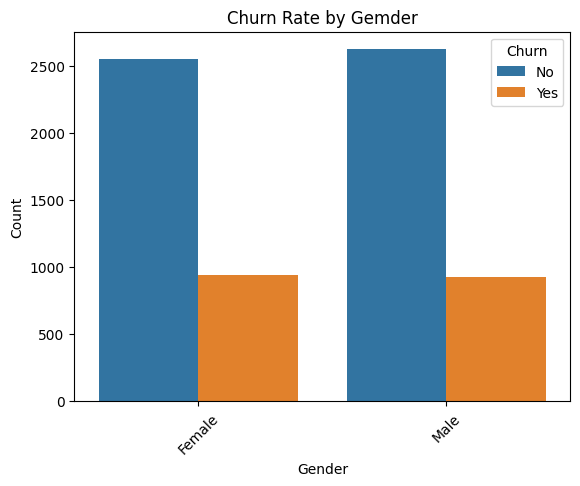

In [22]:
# Creamos un plot de baras de 'gender' y 'Churn'
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Rate by Gemder')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Fuente: Visualizacion de ciencias de datos. Analisis exploratorio de datos y matplotlib casico
# Fuente: Visualizacion avanzada : Clase de estilos, etiquetas, leyend.

Este gráfico de barras muestra la distribución de clientes que han terminado el servicio según su género.

- Ambos géneros presentan una tendencia similar en cuanto a la finalización del servicio, lo que sugiere que el género no es un factor determinante en la decisión de terminar el servicio.

- También observamos que hay más clientes hombres que mujeres en la muestra.
